In [1]:
#load libraries
import tensorflow as tf
import matplotlib.pyplot as plt
from utils.data import *
from utils.MobileNet import *
from utils.models import *
from keras.regularizers import l1,l2
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
#load CIFAR-10 using Keras
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train/255
x_test = x_test/255
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 10))

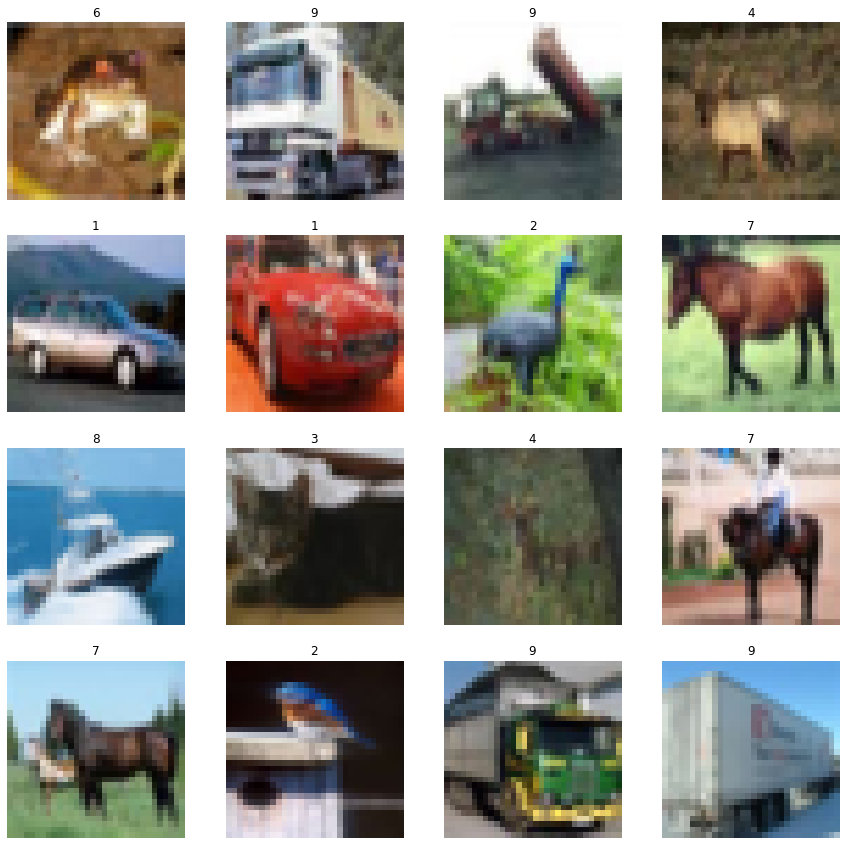

In [3]:
#Show images
fig = plt.figure(figsize=(15, 15))
for i in range(16):
    ax = fig.add_subplot(4,4,i+1)
    ax.imshow(x_train[i,:,:,:])
    ax.axis('off')
    ax.title.set_text(np.argmax(y_train[i]))

In [0]:
#Create and Build the model
#width multiplier = 0.4
model = MobileNetV2(input_shape = x_train.shape[1:], 
              n_classes = 10, 
              alpha = 0.40, 
              reg_c= l2(l=0.001),
              reg_dc = None,
              add_batch_norm = True, 
              add_dropout = False, 
              dropout_rate = 0.5, 
              optimizer = RMSprop(lr=0.001, rho=0.9))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 12)        336       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 12)        48        
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 12)        0         
_________________________________________________________________
depthwise_conv2d_1 (Depthwis (None, 32, 32, 12)        120       
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 12)        48        
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 12)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 25)       

In [0]:
#create imagegenerator for data augmentation
datagen = ImageDataGenerator(
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    validation_split=0.1)

In [0]:
#create training_set and validation_set
train_generator = datagen.flow(x_train,y_train,batch_size=128, subset='training')
validation_generator = datagen.flow(x_train,y_train, subset='validation')

In [22]:
#train the model
history = model.fit_generator(train_generator, 
                              validation_data = validation_generator, 
                              epochs=30, 
                              verbose = 1)

Epoch 1/30
352/352 [==============================] - 263s 746ms/step - loss: 3.6154 - accuracy: 0.3306 - val_loss: 4.1193 - val_accuracy: 0.1038
Epoch 2/30
352/352 [==============================] - 253s 718ms/step - loss: 2.5532 - accuracy: 0.4675 - val_loss: 2.3106 - val_accuracy: 0.2930
Epoch 3/30
352/352 [==============================] - 252s 716ms/step - loss: 2.0293 - accuracy: 0.5518 - val_loss: 2.2817 - val_accuracy: 0.4898
Epoch 4/30
352/352 [==============================] - 252s 716ms/step - loss: 1.7198 - accuracy: 0.6022 - val_loss: 2.2180 - val_accuracy: 0.5244
Epoch 5/30
352/352 [==============================] - 252s 717ms/step - loss: 1.5149 - accuracy: 0.6368 - val_loss: 3.8260 - val_accuracy: 0.4530
Epoch 6/30
352/352 [==============================] - 252s 717ms/step - loss: 1.3636 - accuracy: 0.6780 - val_loss: 1.8190 - val_accuracy: 0.5194
Epoch 7/30
352/352 [==============================] - 253s 718ms/step - loss: 1.2425 - accuracy: 0.7048 - val_loss: 2.6363 -

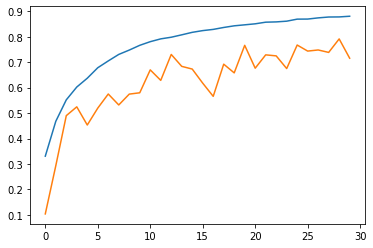

In [23]:
#Plot the accuracy of the train and validation set
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])